In [1]:
import warnings
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

from tqdm.auto import tqdm
import qgrid

sns.set(style="ticks", palette="muted", color_codes=True)

warnings.filterwarnings("ignore")

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

seed = 42

In [2]:
def show_tbl(df):
    return qgrid.showgrid(df, show_toolbar=True)

In [3]:
df = pd.read_csv("Combined_all_air_pollut_types&coords.csv", parse_dates=['DATE'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542322 entries, 0 to 542321
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATE                    542322 non-null  datetime64[ns]
 1   POLSTID                 542322 non-null  object        
 2   Voivodeship             542322 non-null  object        
 3   City                    542322 non-null  object        
 4   county                  542322 non-null  object        
 5   postcode                542322 non-null  object        
 6   LAT                     542322 non-null  float64       
 7   LON                     542322 non-null  float64       
 8   NO2_24H_AVG_POLLUTION   5035 non-null    float64       
 9   O3_24H_AVG_POLLUTION    184172 non-null  float64       
 10  PM10_24H_AVG_POLLUTION  303605 non-null  float64       
 11  PM25_24H_AVG_POLLUTION  113597 non-null  float64       
dtypes: datetime64[ns](1), float64(

In [5]:
df.isnull().sum()

DATE                           0
POLSTID                        0
Voivodeship                    0
City                           0
county                         0
postcode                       0
LAT                            0
LON                            0
NO2_24H_AVG_POLLUTION     537287
O3_24H_AVG_POLLUTION      358150
PM10_24H_AVG_POLLUTION    238717
PM25_24H_AVG_POLLUTION    428725
dtype: int64

In [6]:
df.columns

Index(['DATE', 'POLSTID', 'Voivodeship', 'City', 'county', 'postcode', 'LAT',
       'LON', 'NO2_24H_AVG_POLLUTION', 'O3_24H_AVG_POLLUTION',
       'PM10_24H_AVG_POLLUTION', 'PM25_24H_AVG_POLLUTION'],
      dtype='object')

In [7]:
for col in ['POLSTID', 'Voivodeship', 'City', 'county', 'postcode']:
    print(f"{col} : Total unique categories: {len(set(df[col]))}")

POLSTID : Total unique categories: 297
Voivodeship : Total unique categories: 16
City : Total unique categories: 225
county : Total unique categories: 197
postcode : Total unique categories: 271


Number of stations that does not record PM10 pollutant = 66


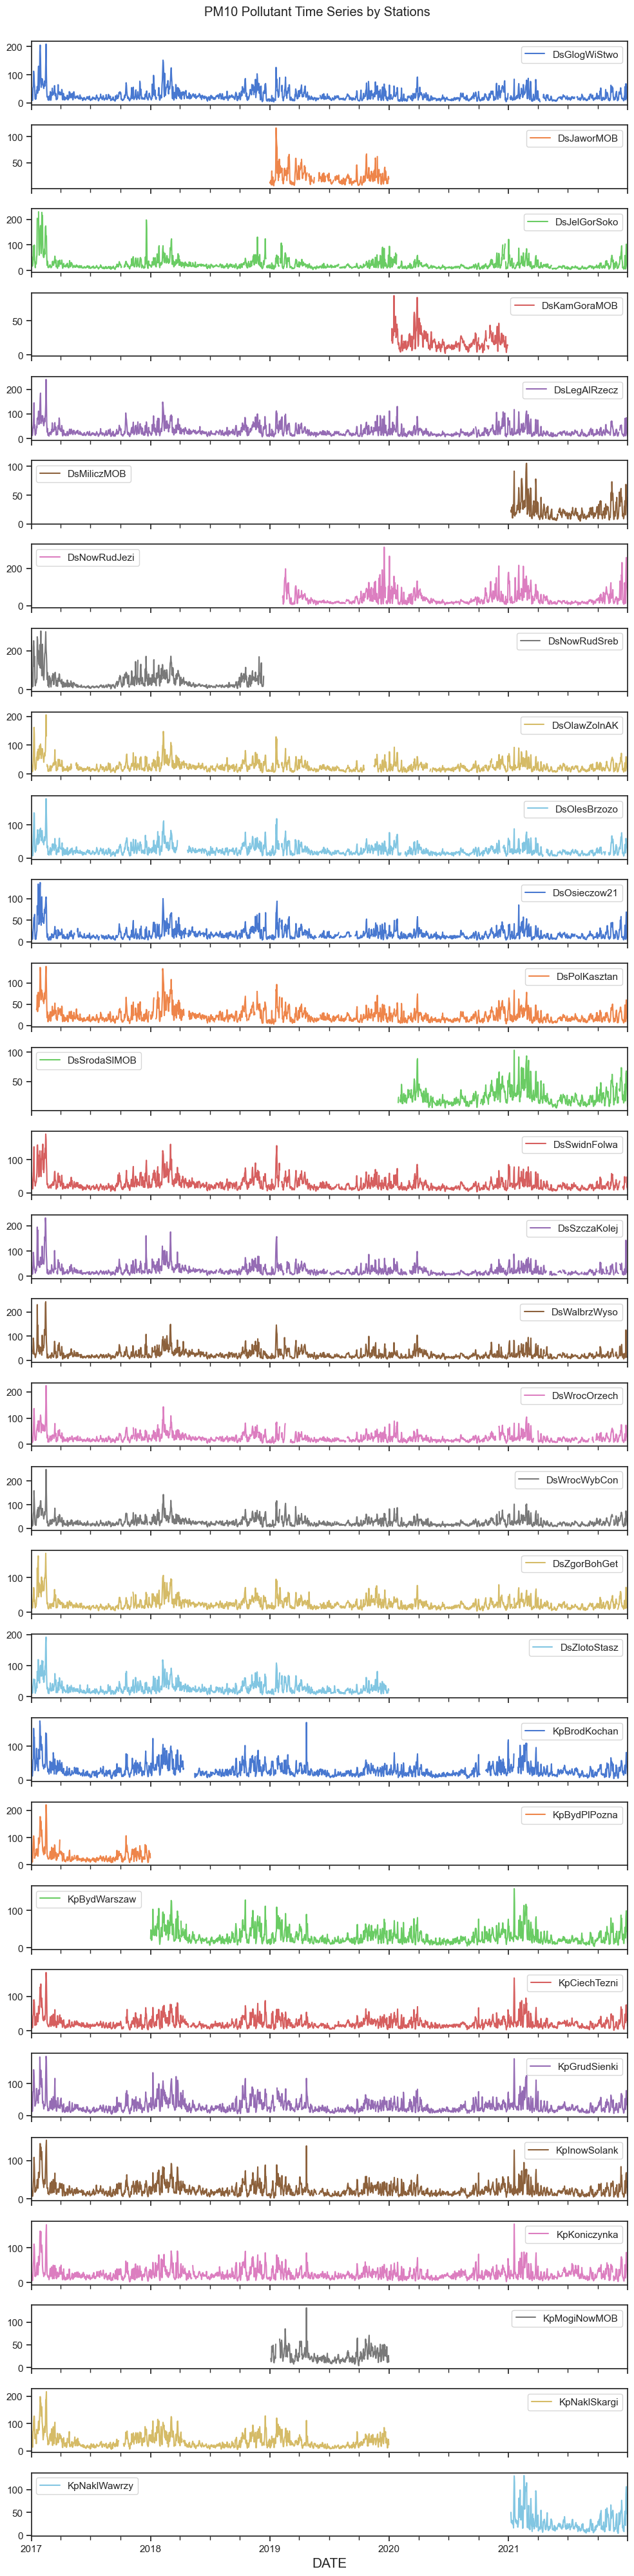

In [8]:
pm10_null_stations = \
df.groupby('POLSTID')['PM10_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['PM10_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record PM10 pollutant = {len(pm10_null_stations)}')

df.loc[~df['POLSTID'].isin(pm10_null_stations)].\
    groupby(['POLSTID', 'DATE'])['PM10_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle("PM10 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

Number of stations that does not record NO2 pollutant = 294


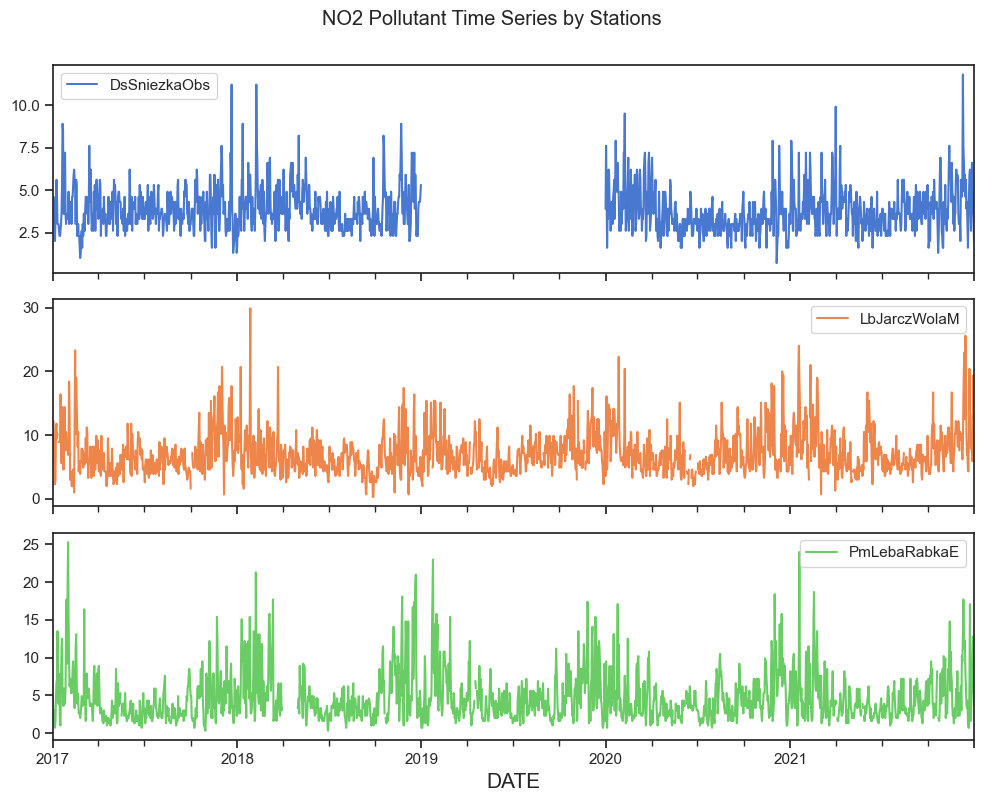

In [9]:
no2_null_stations = \
df.groupby('POLSTID')['NO2_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['NO2_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record NO2 pollutant = {len(no2_null_stations)}')

df.loc[~df['POLSTID'].isin(no2_null_stations)].\
    groupby(['POLSTID', 'DATE'])['NO2_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').plot(subplots=True, figsize=(10, 8));

plt.suptitle("NO2 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

Number of stations that does not record O3 pollutant = 172


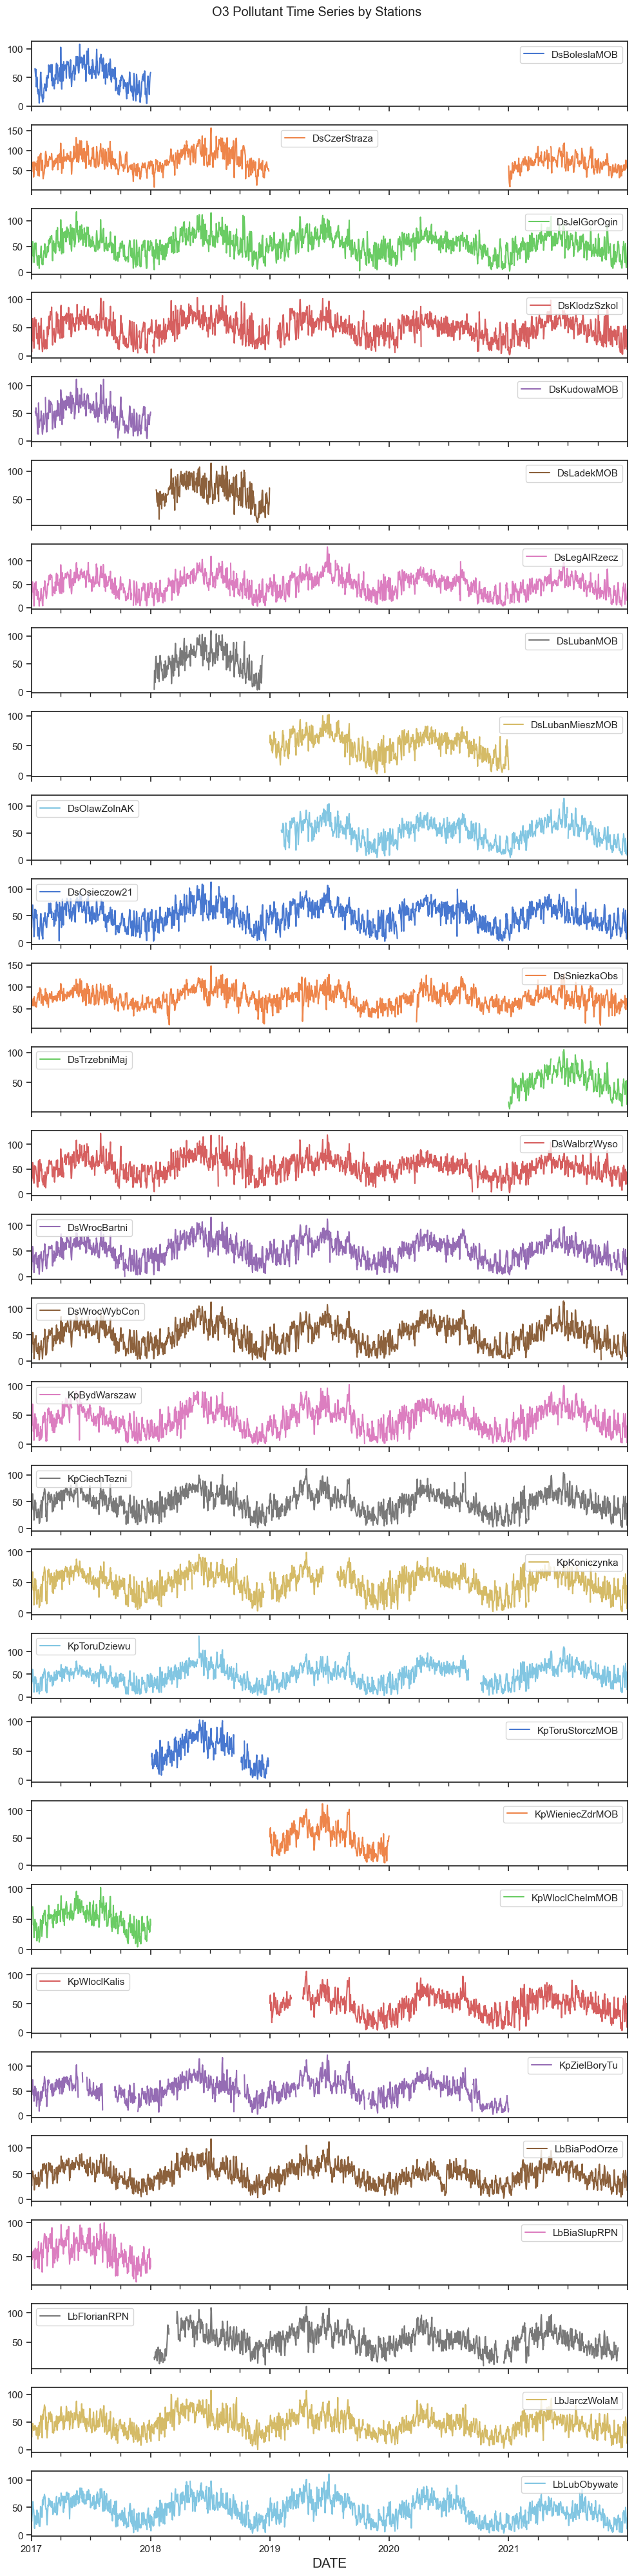

In [10]:
o3_null_stations = \
df.groupby('POLSTID')['O3_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['O3_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record O3 pollutant = {len(o3_null_stations)}')

df.loc[~df['POLSTID'].isin(o3_null_stations)].\
    groupby(['POLSTID', 'DATE'])['O3_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle("O3 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

Number of stations that does not record PM25 pollutant = 217


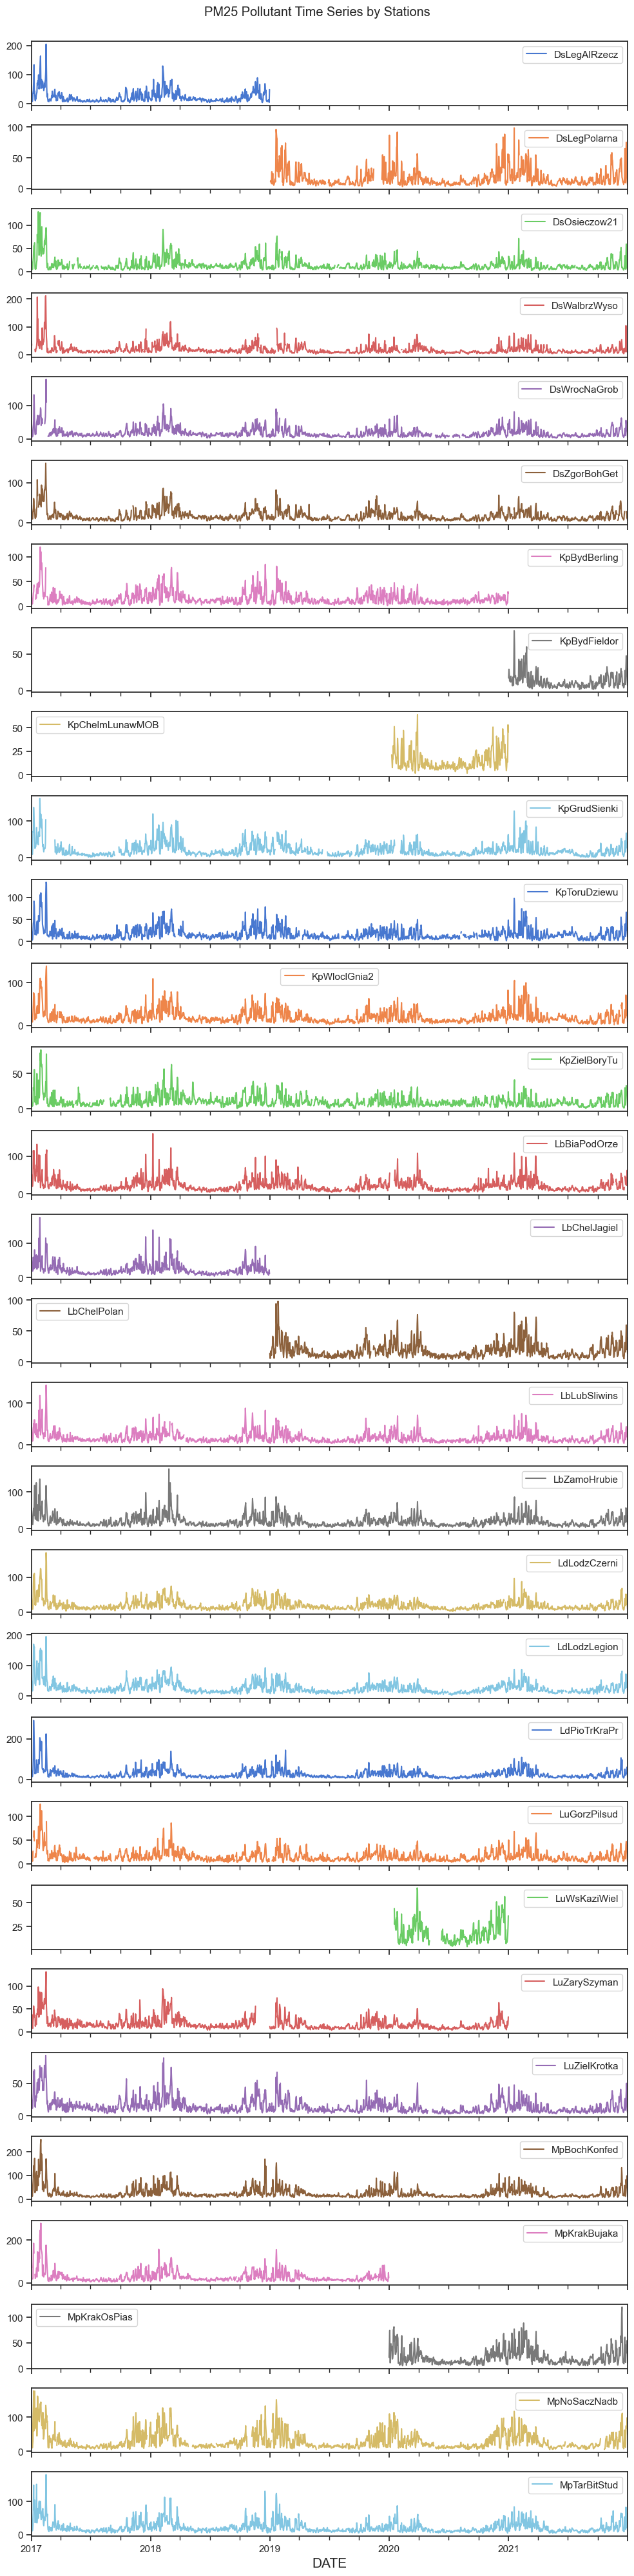

In [11]:
pm25_null_stations = \
df.groupby('POLSTID')['PM25_24H_AVG_POLLUTION'].mean()\
[pd.isnull(df.groupby('POLSTID')['PM25_24H_AVG_POLLUTION'].mean())].index

print(f'Number of stations that does not record PM25 pollutant = {len(pm25_null_stations)}')

df.loc[~df['POLSTID'].isin(pm25_null_stations)].\
    groupby(['POLSTID', 'DATE'])['PM25_24H_AVG_POLLUTION'].mean().\
        unstack('POLSTID').iloc[:, :30].\
            plot(subplots=True, figsize=(10, 40));

plt.suptitle("PM25 Pollutant Time Series by Stations",  y=1)
plt.tight_layout()

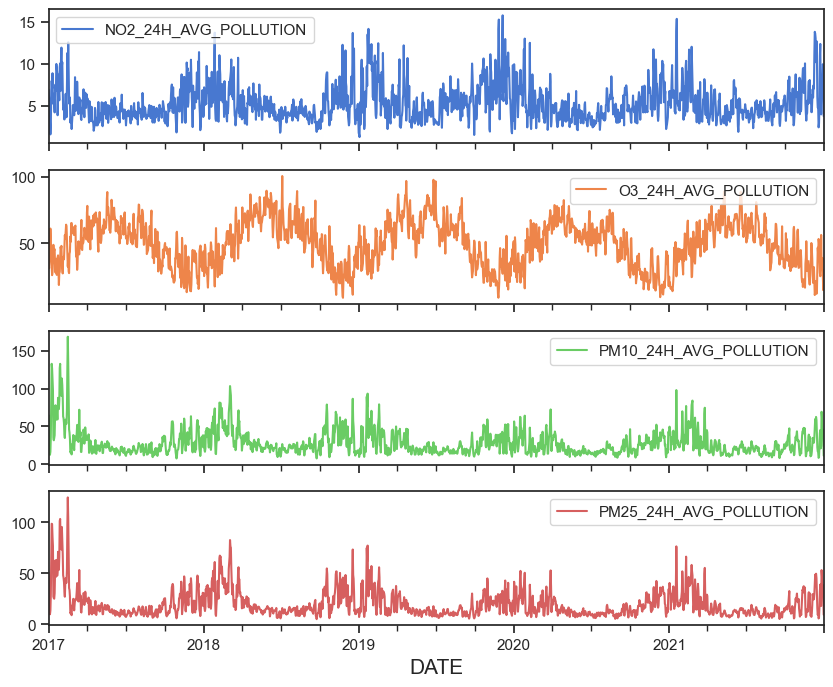

In [12]:
df.groupby('DATE')[[
    'NO2_24H_AVG_POLLUTION', 
    'O3_24H_AVG_POLLUTION', 
    'PM10_24H_AVG_POLLUTION', 
    'PM25_24H_AVG_POLLUTION'
]].mean().plot(subplots=True, figsize=(10, 8));

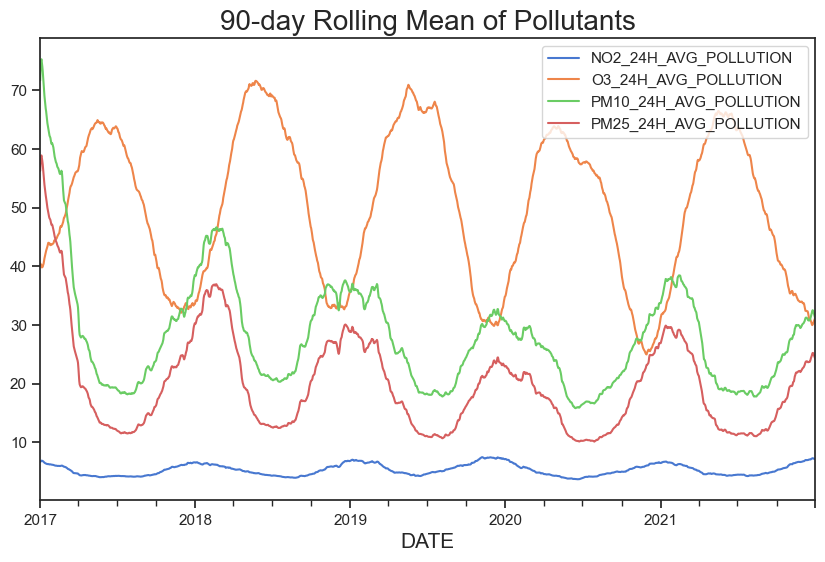

In [13]:
df.groupby('DATE')[[
    'NO2_24H_AVG_POLLUTION', 
    'O3_24H_AVG_POLLUTION', 
    'PM10_24H_AVG_POLLUTION', 
    'PM25_24H_AVG_POLLUTION'
]].mean().rolling(90, center=True, min_periods=30).mean().\
    plot(figsize=(10, 6), title = "90-day Rolling Mean of Pollutants");

In [14]:
df['day'] = df['DATE'].dt.day
df['month'] = df['DATE'].dt.month
df['year'] = df['DATE'].dt.year
df['dayofweek'] = df['DATE'].dt.dayofweek

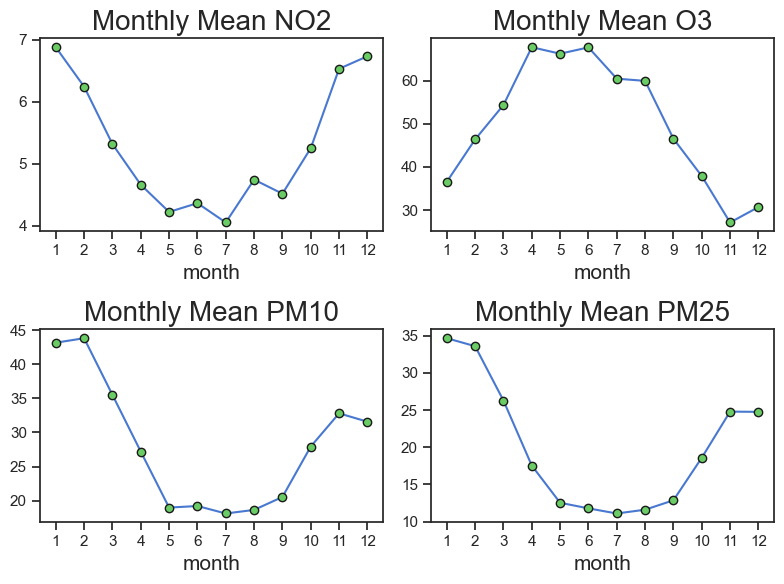

In [15]:
pollutant_cols = ['NO2_24H_AVG_POLLUTION', 'O3_24H_AVG_POLLUTION', 'PM10_24H_AVG_POLLUTION', 
                  'PM25_24H_AVG_POLLUTION']

fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6))

for col, ax in zip(pollutant_cols, axes.flatten()):
    
    df.groupby('month')[col].mean().plot(ax=ax, marker="o", mfc="g", mec="k")
    ax.set_xticks(np.arange(1, 13, 1))
    ax.set_title(f'Monthly Mean {col.split("_")[0]}');

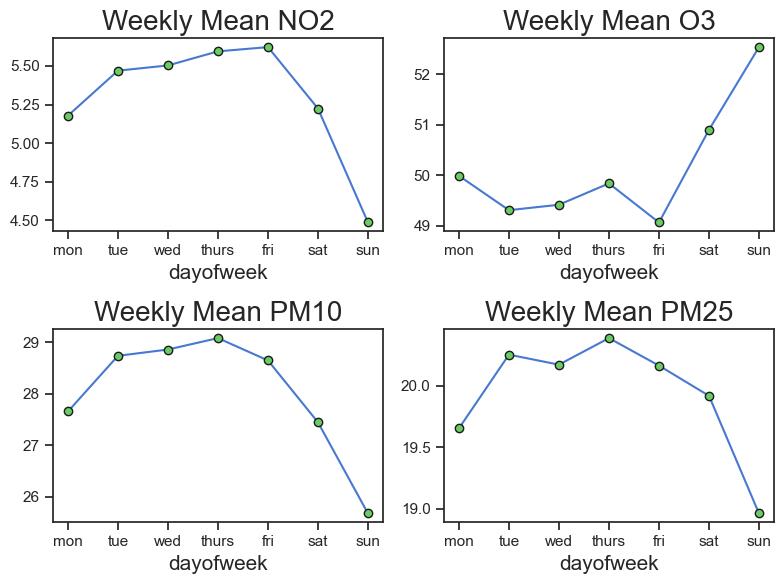

In [16]:
days=["mon", "tue", "wed", "thurs", "fri", "sat", "sun"]

fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6))

for col, ax in zip(pollutant_cols, axes.flatten()):
    
    df.groupby('dayofweek')[col].mean().plot(ax=ax, marker="o", mfc="g", mec="k")
    ax.set_xticks(np.arange(7), days)
    ax.set_title(f'Weekly Mean {col.split("_")[0]}');

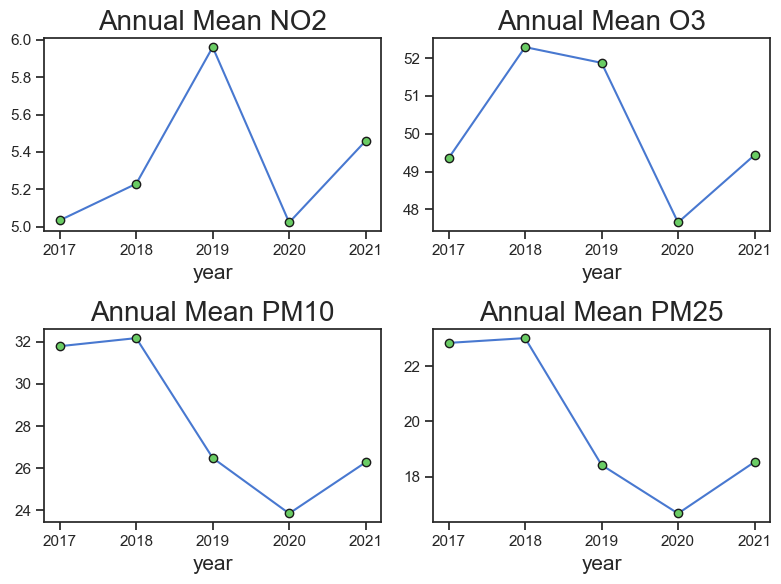

In [17]:
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6))

for col, ax in zip(pollutant_cols, axes.flatten()):
    
    df.groupby('year')[col].mean().plot(ax=ax, marker="o", mfc="g", mec="k")
    ax.set_title(f'Annual Mean {col.split("_")[0]}');

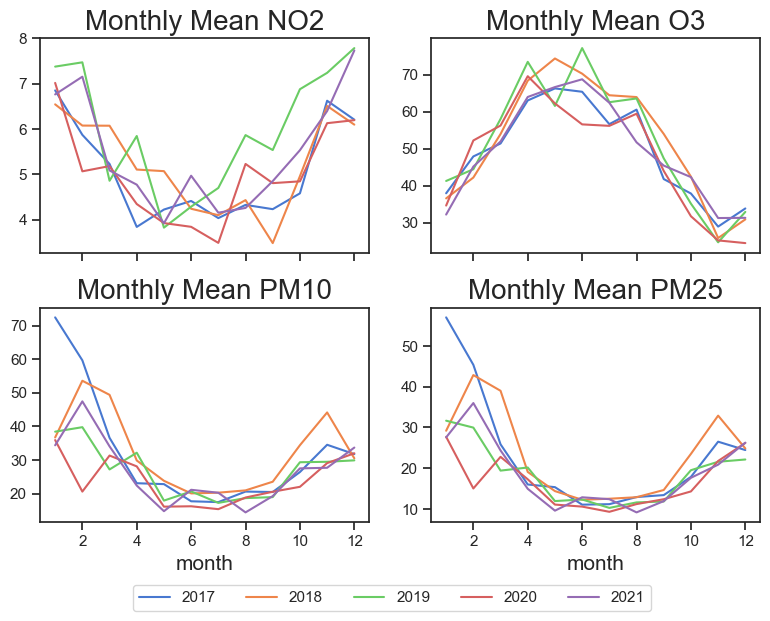

In [19]:
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6), sharex=True)

for col, ax in zip(pollutant_cols, axes.flatten()):
    df.groupby(['year', 'month'])[pollutant_cols].mean().unstack('year')[col].\
        plot(ax=ax, title=f"Monthly Mean {col.split('_')[0]}", legend=None)
    
fig.legend(labels=df['year'].unique(), loc='center', bbox_to_anchor=(0.5,-0.01), ncol=5, 
           bbox_transform=fig.transFigure);

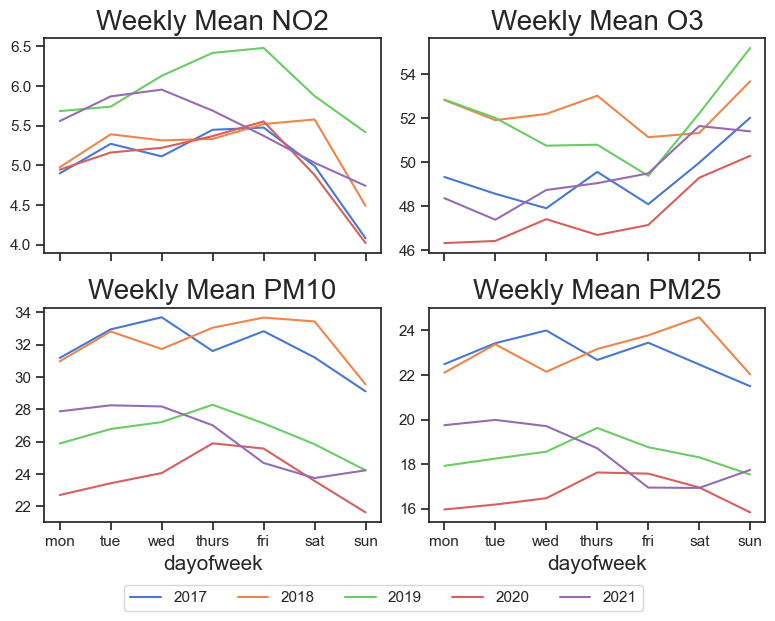

In [20]:
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(8, 6), sharex=True)

for col, ax in zip(pollutant_cols, axes.flatten()):
    df.groupby(['year', 'dayofweek'])[pollutant_cols].mean().unstack('year')[col].\
        plot(ax=ax, title=f"Weekly Mean {col.split('_')[0]}", legend=None)
    
    ax.set_xticks(np.arange(7), days)
    
fig.legend(labels=df['year'].unique(), loc='center', bbox_to_anchor=(0.5,-0.01), ncol=5, 
           bbox_transform=fig.transFigure);